<a href="https://colab.research.google.com/github/shanzabakhtds/Student-Data-Analysis/blob/main/Student_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for reshaping arrays and working with numerical data
import numpy as np

#used for working with datasets, offering functions for data analysis, cleaning, exploration, and manipulation
import pandas as pd

#used for pie charts for visualizing results
from matplotlib import pyplot as plt

#for preparing text data for analysis, It's used to create a matrix of word counts from text reviews, allowing the model to work with textual data
from sklearn.feature_extraction.text import CountVectorizer

#For data preprocessing, model training, performance evaluation, and user interaction
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/content/Students data.csv')

In [ ]:
df.head()


,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [ ]:
display(df.head(10))

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
5,1146,A,male,3,65.04,60,60,39,61,65,74,60,F,B,C,0,0
6,1147,A,male,4,77.11,60,43,52,63,71,72,75,G,A,A,0,1
7,1148,A,female,5,64.75,60,38,60,63,70,68,51,H,B,C,0,0
8,1149,B,female,5,77.92,61,60,66,68,80,78,71,I,B,A,0,0
9,1150,A,female,5,76.50,60,61,60,69,73,60,62,H,B,A,0,0


In [ ]:
df.tail()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
100,1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
101,1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
102,1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2
103,1244,A,male,1,86.60,92,82,91,99,94,82,78,S,B,A,0,2
104,1245,A,male,1,93.71,93,97,99,100,97,90,90,K,B,A,0,2


In [ ]:
#Checking number of rows and columns in a dataset
df.shape


(105, 17)

In [ ]:
df.describe()  # used to get a descriptive statistics summary of a given dataframe.


,ID,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,1193.000000,1.790476,82.957048,76.057143,71.961905,78.942857,85.133333,83.876190,80.761905,75.323810,0.504762,0.714286
std,30.454885,1.673867,6.053187,11.722618,12.197039,14.997326,10.269509,10.514363,10.296119,13.003324,0.889293,0.828742
min,1141.000000,1.000000,63.490000,46.000000,38.000000,17.000000,51.000000,29.000000,54.000000,9.000000,0.000000,0.000000
25%,1167.000000,1.000000,79.340000,67.000000,64.000000,71.000000,80.000000,79.000000,74.000000,67.000000,0.000000,0.000000
50%,1193.000000,1.000000,84.110000,76.000000,73.000000,83.000000,87.000000,85.000000,81.000000,76.000000,0.000000,0.000000
75%,1219.000000,1.000000,87.300000,84.000000,80.000000,91.000000,92.000000,92.000000,89.000000,85.000000,0.000000,1.000000
max,1245.000000,7.000000,93.710000,98.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,3.000000,2.000000


In [ ]:
df.info()  #allows us to learn the shape of object types of our data.
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
101,1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
102,1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2
103,1244,A,male,1,86.60,92,82,91,99,94,82,78,S,B,A,0,2


In [ ]:
#Check missing values and helps to understand each column
df.isna().sum()

ID                     0
class                  0
gender                 0
race                   0
GPA                    0
Algebra                0
Calculus1              0
Calculus2              0
Statistics             0
Probability            0
Measure                0
Functional_analysis    0
from1                  0
from2                  0
from3                  0
from4                  0
y                      0
dtype: int64

In [ ]:
df.dtypes


ID                       int64
class                   object
gender                  object
race                     int64
GPA                    float64
Algebra                  int64
Calculus1                int64
Calculus2                int64
Statistics               int64
Probability              int64
Measure                  int64
Functional_analysis      int64
from1                   object
from2                   object
from3                   object
from4                    int64
y                        int64
dtype: object

In [ ]:
df.nunique()

ID                     105
class                    2
gender                   2
race                     7
GPA                    103
Algebra                 39
Calculus1               37
Calculus2               38
Statistics              30
Probability             36
Measure                 38
Functional_analysis     35
from1                   28
from2                    2
from3                    5
from4                    3
y                        3
dtype: int64

#Checking Column Names

In [ ]:
print("\n Columns Names are : ")
print("  ")
df.columns




 Columns Names are : 
  


Index(['ID', 'class', 'gender', 'race', 'GPA', 'Algebra', 'Calculus1',
       'Calculus2', 'Statistics', 'Probability', 'Measure',
       'Functional_analysis', 'from1', 'from2', 'from3', 'from4', 'y'],
      dtype='object')

In [ ]:
df.drop(['class', 'ID', 'from1', 'from2', 'from3', 'from4', 'y'], axis=1, inplace=True)


In [ ]:

# Now, use head() to display the first few rows of the modified DataFrame
print(df.head())


   gender  race    GPA  Algebra  Calculus1  Calculus2  Statistics  \
0    male     1  73.47       64         81         87          60   
1  female     1  71.22       57         50         51          51   
2  female     2  74.56       47         48         71          60   
3  female     1  72.89       46         72         38          60   
4  female     1  70.11       49         45         63          60   

   Probability  Measure  Functional_analysis  
0           74       71                   60  
1           55       62                   61  
2           61       68                   64  
3           29       54                   51  
4           66       66                   61  


#Dimensions of the dataset

In [ ]:
print("Dimensions of the dataset in (rows, columns): ", df.shape)

Dimensions of the dataset in (rows, columns):  (105, 10)


#Descriptive Statistics

In [ ]:
statistics = df.describe().transpose()
print("\nDescriptive Statistics:")
print(" ")
print(statistics)


Descriptive Statistics:
 
                     count       mean        std    min    25%    50%   75%  \
race                 105.0   1.790476   1.673867   1.00   1.00   1.00   1.0   
GPA                  105.0  82.957048   6.053187  63.49  79.34  84.11  87.3   
Algebra              105.0  76.057143  11.722618  46.00  67.00  76.00  84.0   
Calculus1            105.0  71.961905  12.197039  38.00  64.00  73.00  80.0   
Calculus2            105.0  78.942857  14.997326  17.00  71.00  83.00  91.0   
Statistics           105.0  85.133333  10.269509  51.00  80.00  87.00  92.0   
Probability          105.0  83.876190  10.514363  29.00  79.00  85.00  92.0   
Measure              105.0  80.761905  10.296119  54.00  74.00  81.00  89.0   
Functional_analysis  105.0  75.323810  13.003324   9.00  67.00  76.00  85.0   

                        max  
race                   7.00  
GPA                   93.71  
Algebra               98.00  
Calculus1            100.00  
Calculus2             99.00  
St

ABOVE HERE


Count: This shows the total number.

Mean: Shows the average.

Std: Standard deviation value

Min: Minimum value

25%: First Quantile

50%: Median or Second Quantile

75%: Third Quantile

Max: Maximum value


# **DATA  VISUALIZATION**



In [ ]:
# Assuming you have a DataFrame 'df' with columns dropped as mentioned
# Calculate the correlation matrix
correlation_matrix = df.corr()


<ipython-input-116-4dd2052bc6cd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


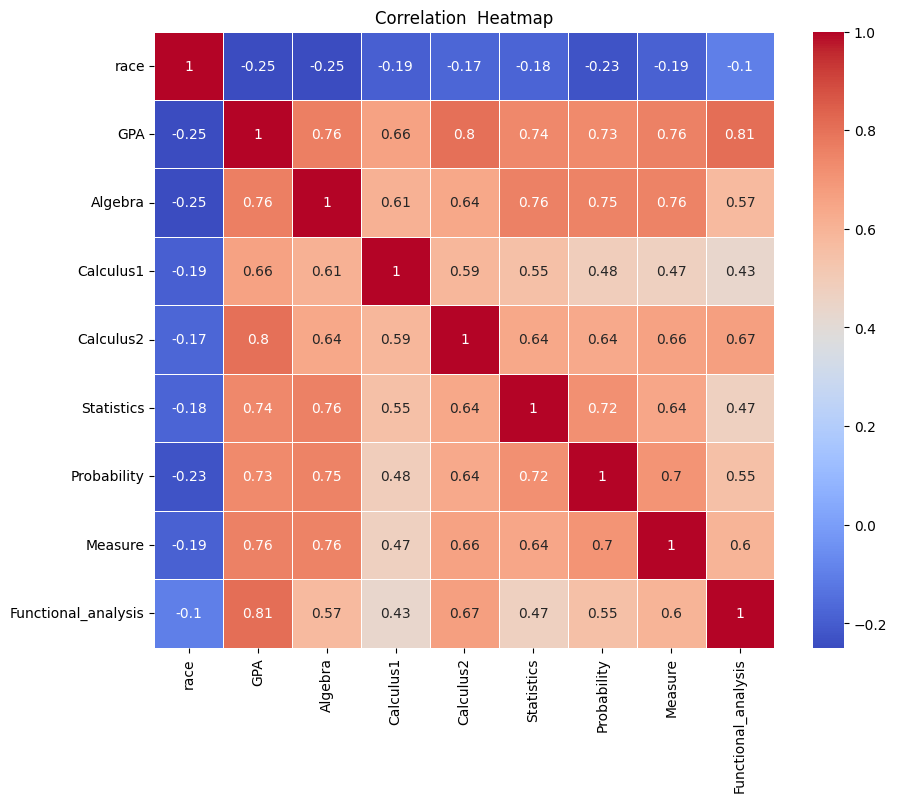

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#annot=True adds annotations (correlation values) to the cells.
#cmap='coolwarm' specifies the color map for the heatmap. You can choose a different colormap if desired.
#linewidths=0.5 sets the linewidth between cells in the heatmap



plt.title("Correlation  Heatmap") #adds a title to the heatmap.
plt.show()



**#PAIRPLOT**

It is a type of data visualization in which a grid of scatterplots is created, allowing you to visualize the pairwise relationships between multiple variables in a dataset. It's especially useful when you want to explore how different variables are related to each other.

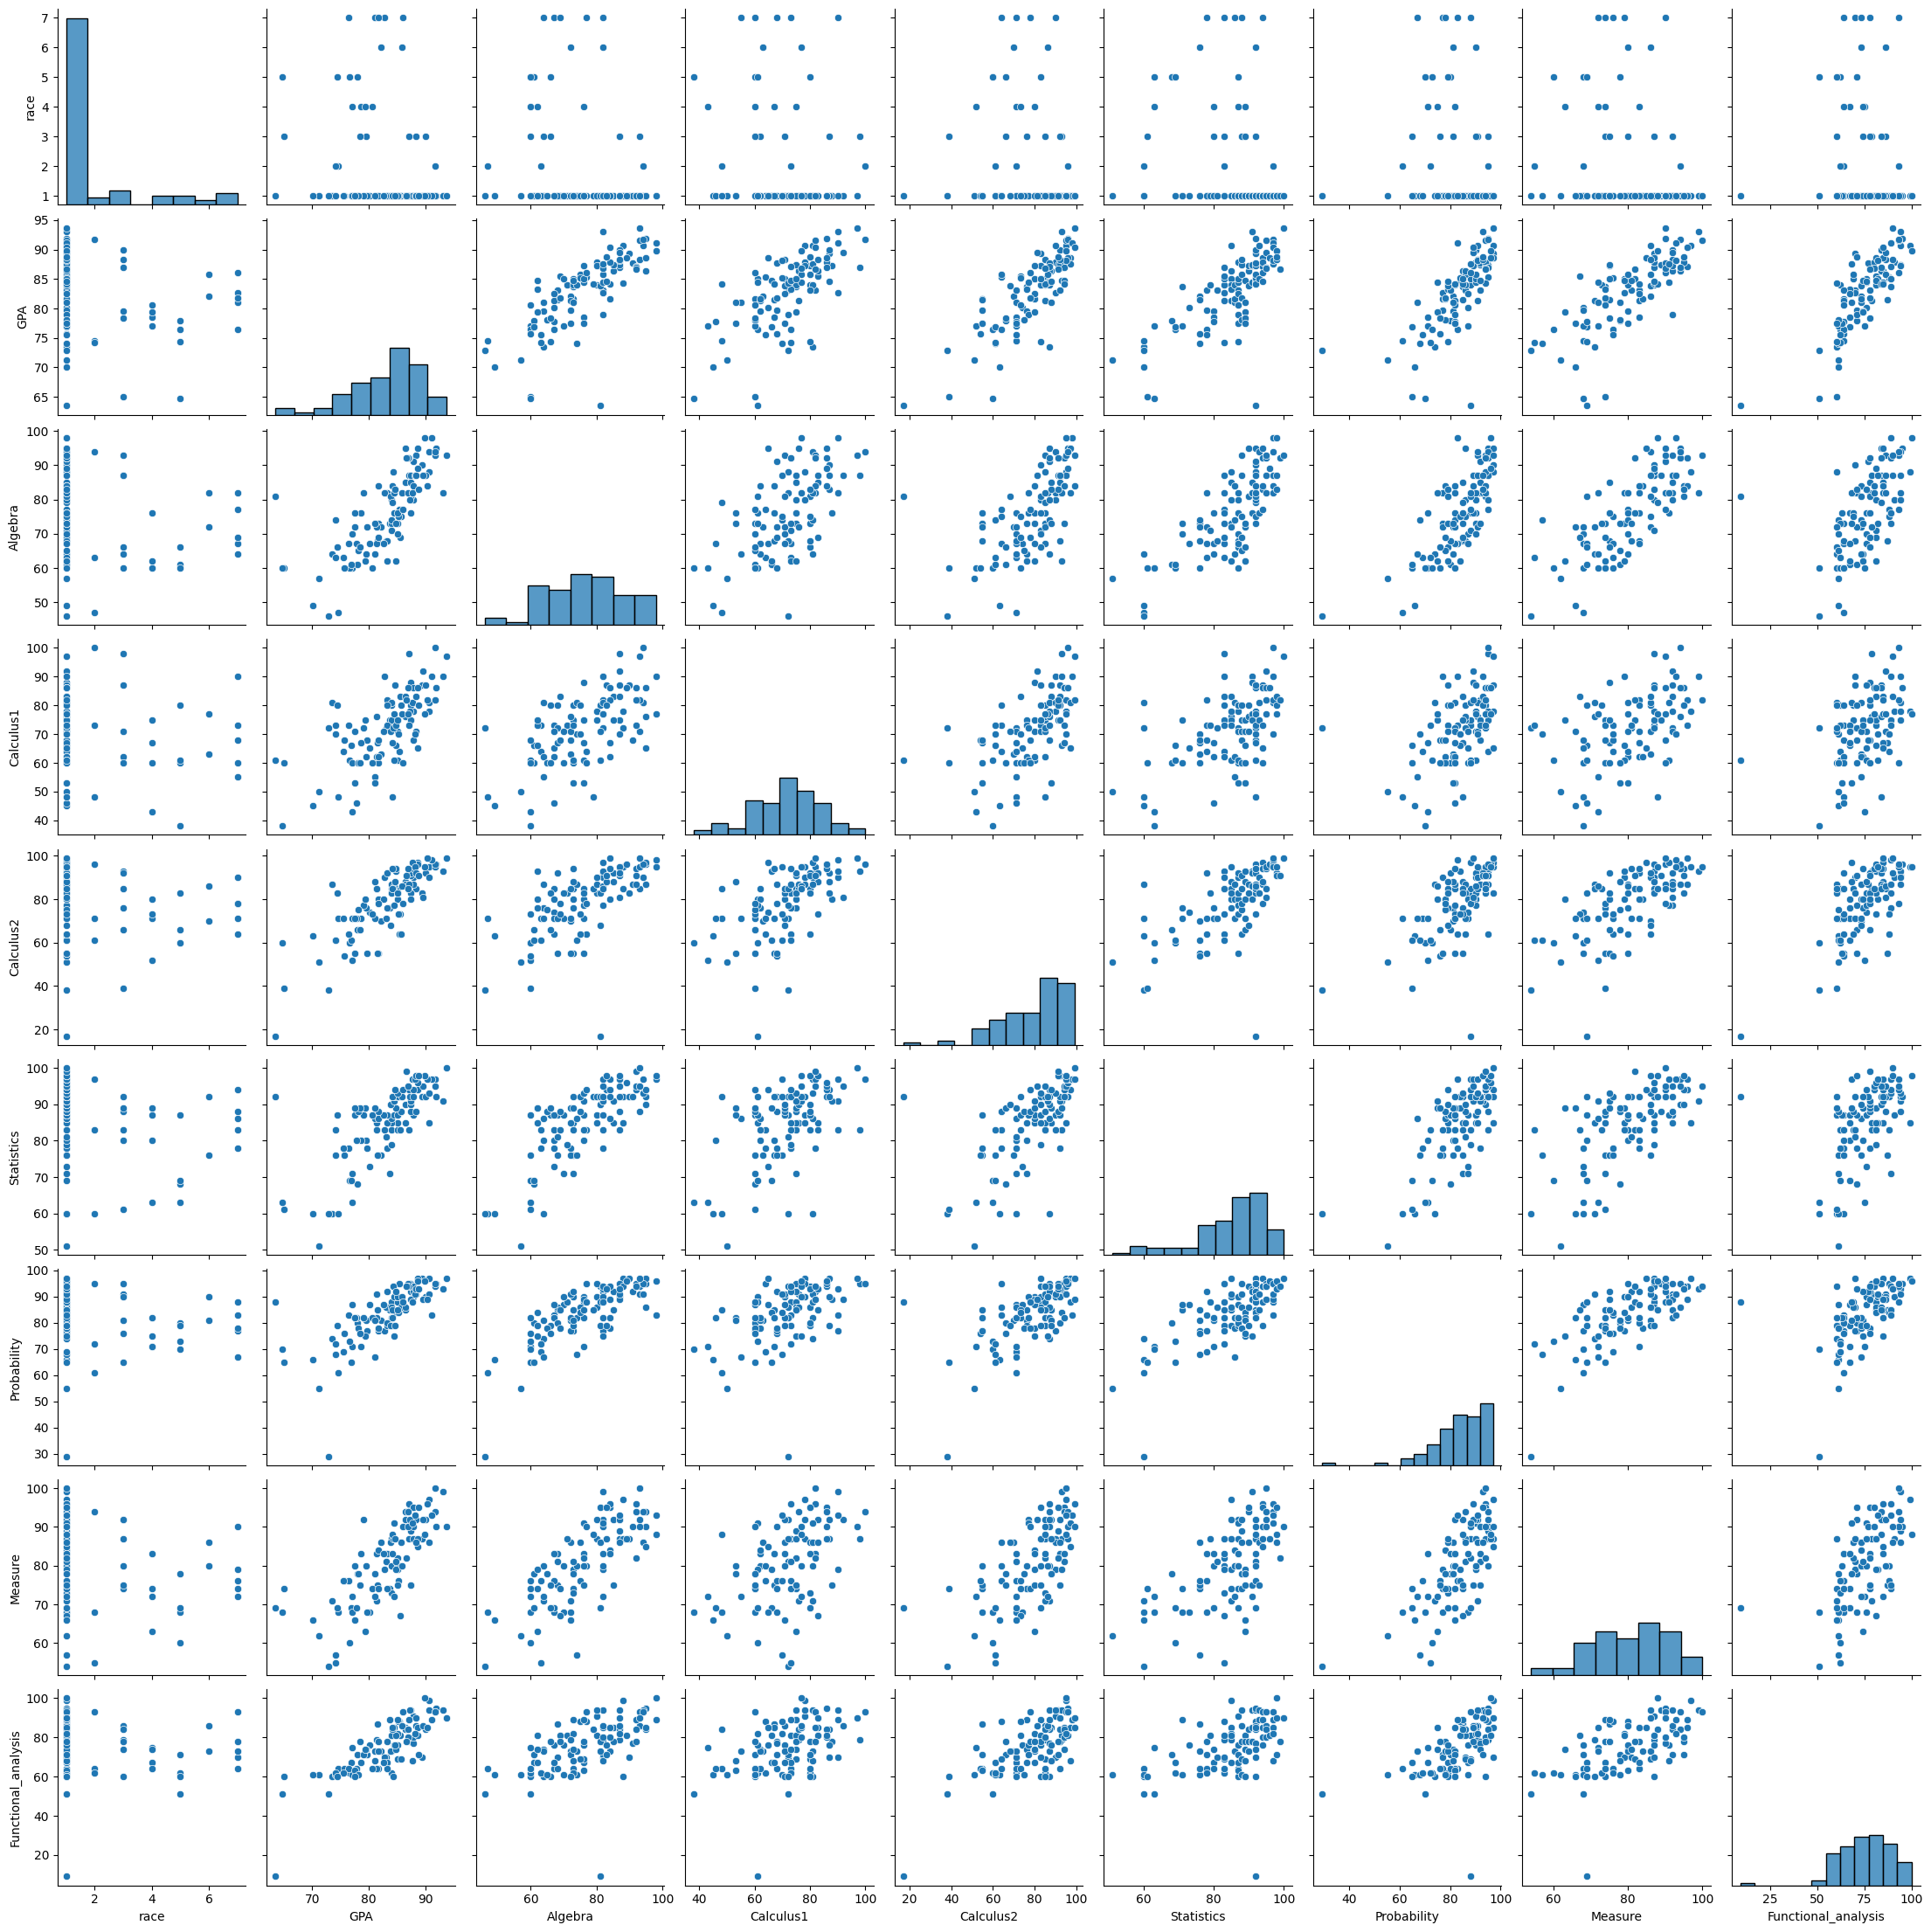

In [ ]:
sns.pairplot(data = df)



<Axes: xlabel='gender', ylabel='count'>

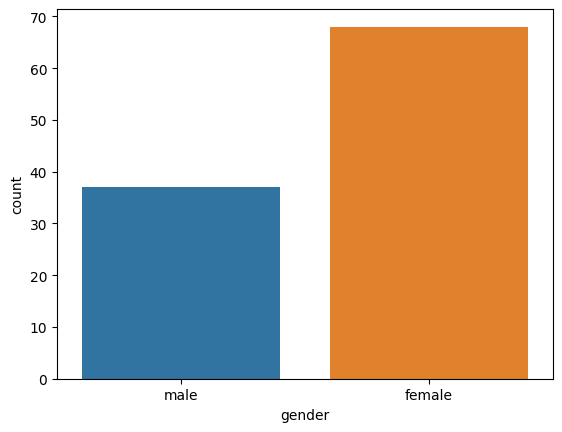

In [ ]:
sns.countplot(x = 'gender',data = df)

<ipython-input-146-22a9722d633d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['race'])


<Axes: xlabel='race', ylabel='Density'>

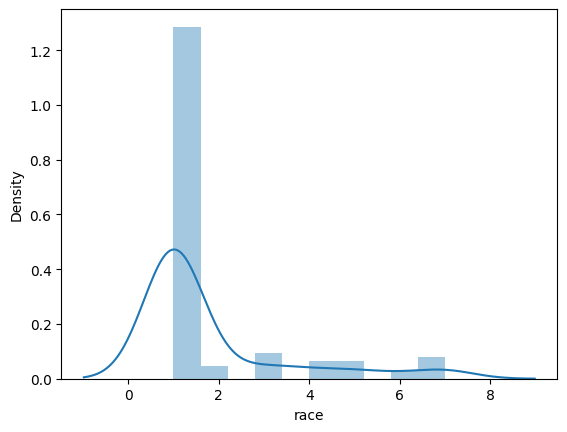

In [ ]:
sns.distplot(df['race'])


<Axes: xlabel='gender', ylabel='count'>

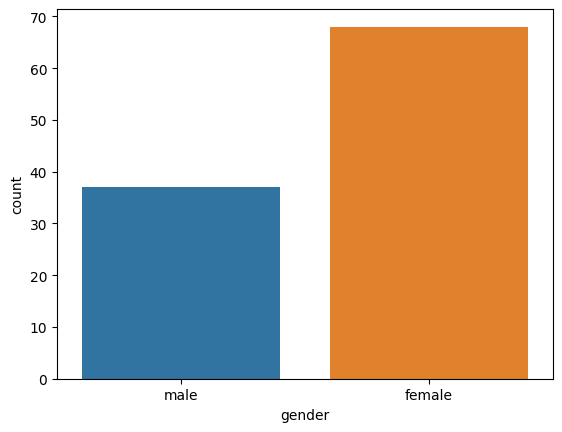

In [ ]:
sns.countplot(x = 'gender',data = df)

<Axes: xlabel='Algebra', ylabel='count'>

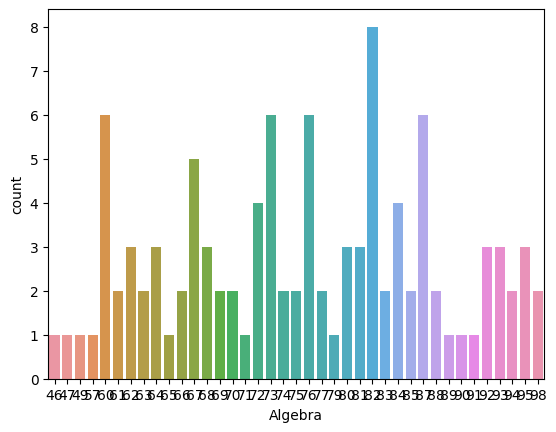

In [ ]:
sns.countplot(x = 'Algebra',data = df)

<ipython-input-166-43c6c1ca17c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Algebra'])


<Axes: xlabel='Algebra', ylabel='Density'>

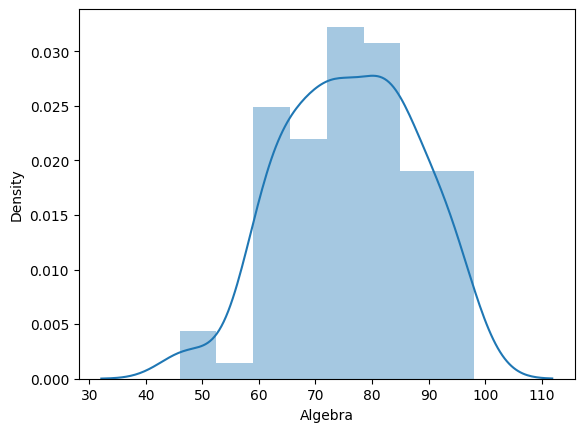

In [ ]:
sns.distplot(df['Algebra'])

<Axes: xlabel='Calculus1', ylabel='count'>

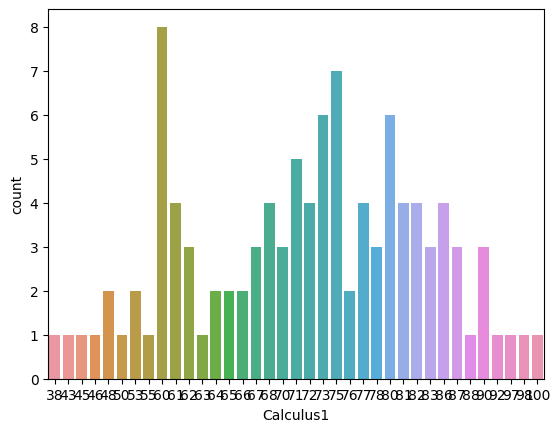

In [ ]:
sns.countplot(x = 'Calculus1',data = df)








<ipython-input-167-06731a5a68d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calculus1'])


<Axes: xlabel='Calculus1', ylabel='Density'>

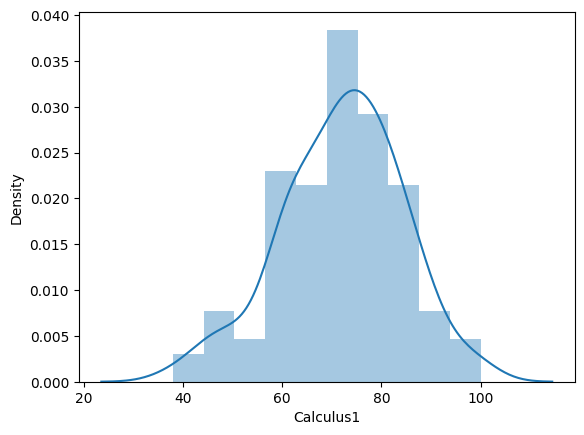

In [ ]:
sns.distplot(df['Calculus1'])

<Axes: xlabel='Calculus2', ylabel='count'>

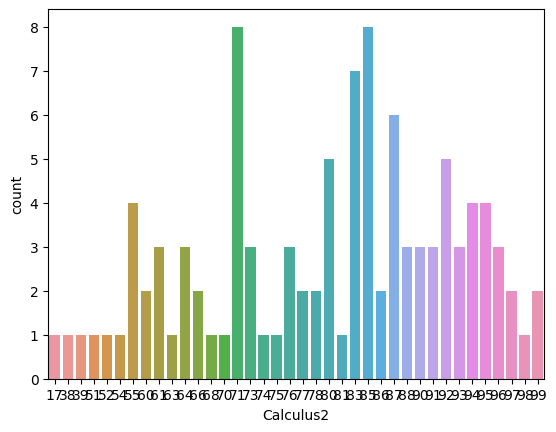

In [ ]:

sns.countplot(x = 'Calculus2',data = df)



<ipython-input-168-0331fca5374a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calculus2'])


<Axes: xlabel='Calculus2', ylabel='Density'>

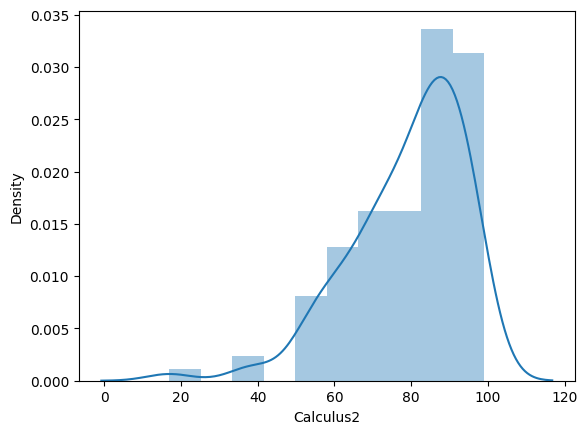

In [ ]:
sns.distplot(df['Calculus2'])

<Axes: xlabel='Statistics', ylabel='count'>

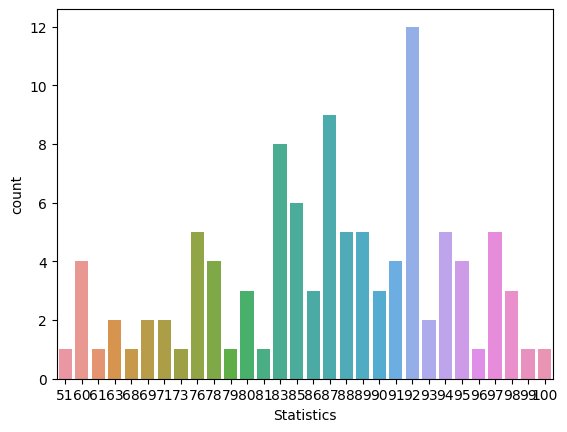

In [ ]:

sns.countplot(x = 'Statistics',data = df)



<ipython-input-169-43ce01d4c703>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Statistics'])


<Axes: xlabel='Statistics', ylabel='Density'>

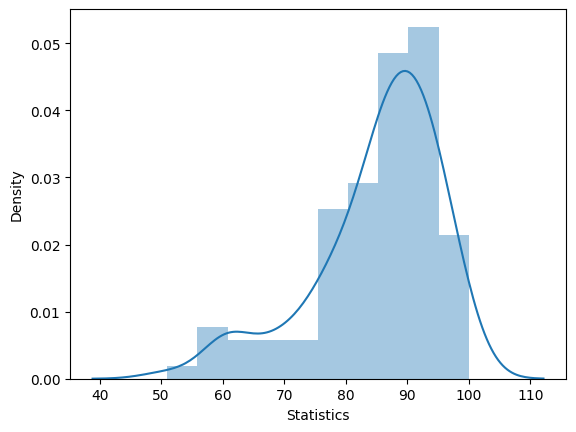

In [ ]:
sns.distplot(df['Statistics'])

<Axes: xlabel='Probability', ylabel='count'>

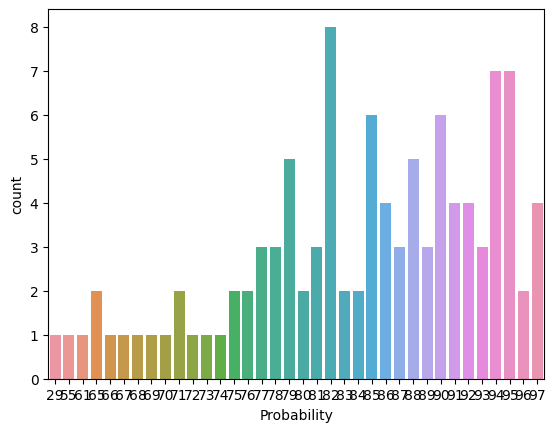

In [ ]:
sns.countplot(x = 'Probability',data = df)


<ipython-input-170-fe0ebc3b019d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Probability'])


<Axes: xlabel='Probability', ylabel='Density'>

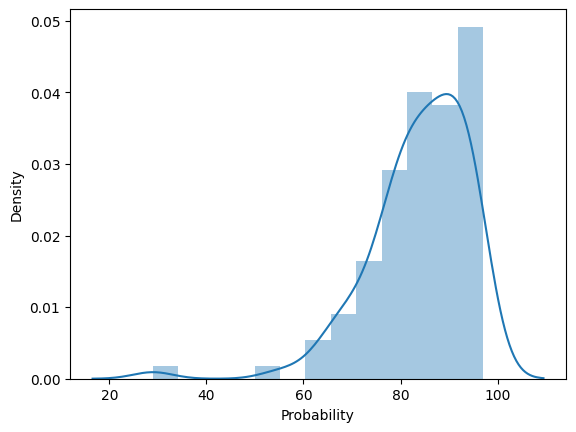

In [ ]:
sns.distplot(df['Probability'])

<Axes: xlabel='Measure', ylabel='count'>

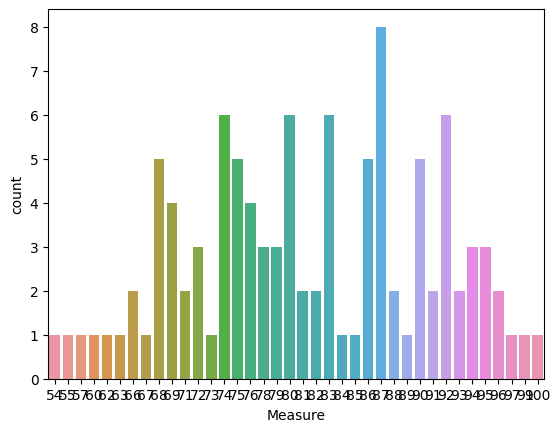

In [ ]:
sns.countplot(x = 'Measure',data = df)


<ipython-input-171-7a6e37204b7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Measure'])


<Axes: xlabel='Measure', ylabel='Density'>

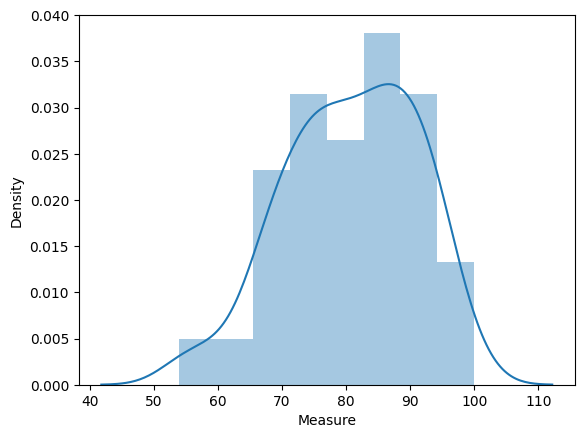

In [ ]:
sns.distplot(df['Measure'])

<Axes: xlabel='Functional_analysis', ylabel='count'>

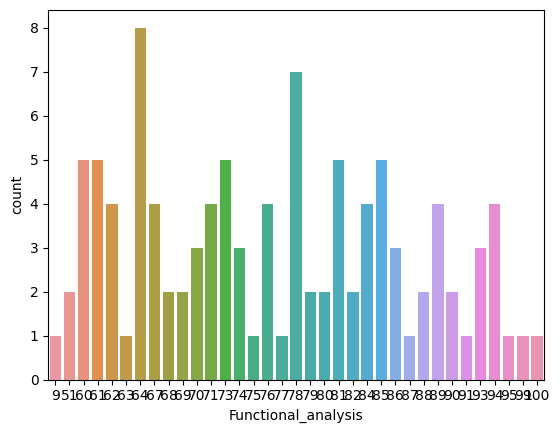

In [ ]:
sns.countplot(x = 'Functional_analysis',data = df)


<ipython-input-172-de3cb77fe5e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Functional_analysis'])


<Axes: xlabel='Functional_analysis', ylabel='Density'>

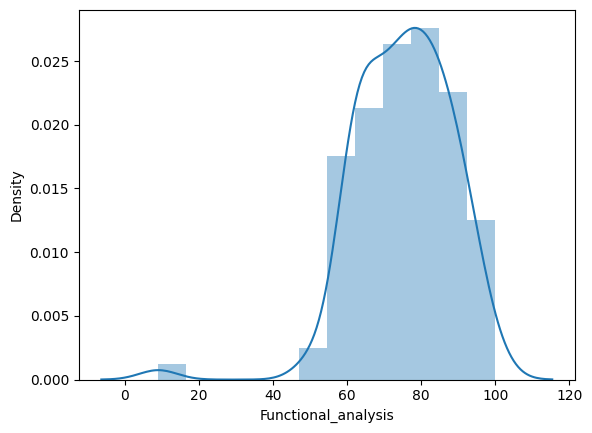

In [ ]:
sns.distplot(df['Functional_analysis'])